# 数据集统计结果

In [1]:
import os
os.chdir('../') # 当前项目的根目录
print(os.getcwd())

/data/benchmarking-gnns


In [7]:
"""
    IMPORTING LIBS
"""
import numpy as np
import socket
import time

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [8]:
from data.data import LoadData # import dataset

## 1. TU数据集统计可视化（D&D）

In [62]:
def visualize_TUs_data(DATASET_NAME):
    print("[I] Loading data (notebook) ...")
    dataset = LoadData(DATASET_NAME)
    trainset, valset, testset = dataset.train, dataset.val, dataset.test
    print("[I] Finished loading.")

    # Original Statistics
    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.test, dataset.val]:
        num_nodes += [g.number_of_nodes() for g in split[0][:][0]]
        graph_labels += split[0][:][1]
    orig_mean, orig_std, orig_max, orig_min = np.mean(num_nodes), np.std(num_nodes), np.max(num_nodes), np.min(num_nodes)

    max_nodes = int(orig_mean+orig_std)
    print("Original Dataset Statistics:\n")
    print("Max nodes {}, Min nodes {}\n".format(orig_max, orig_min))
    print("Mean no. of nodes {}, S.d. {}\n".format(orig_mean, orig_std))

    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.test, dataset.val]:
        split_num_nodes, split_graph_labels = [], []
        g = split[0][:][0]
        lab = split[0][:][1]
        for idx in range(len(g)):
            if g[idx].number_of_nodes() < max_nodes:
                split_num_nodes.append(g[idx].number_of_nodes())
                split_graph_labels.append(lab[idx])


        num_nodes += split_num_nodes
        graph_labels += split_graph_labels
    label_bins = len(np.unique(graph_labels))
    
    print("VISUALIZATIONS:\nMax nodes in consideration: {}".format(max_nodes))
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    
    plt.hist(num_nodes, bins=len(np.unique(num_nodes)))
    plt.xlabel('Number of Nodes in Graph', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(122)
    plt.hist2d(graph_labels, num_nodes, bins=[label_bins, 20])
    plt.xlabel(r'Graph label', fontsize=12)
    plt.ylabel(r'Graph size (number of nodes)', fontsize=12)
    plt.colorbar()
    plt.show()
    
    print("Correlation between graph size (number of nodes) and labels: %.2f" % np.corrcoef(graph_labels, num_nodes)[0,1])

### TU数据集：D&D

[I] Loading data (notebook) ...
No Node Attribute Data
[!] Dataset:  DD
Time taken: 10.4258s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 5748, Min nodes 30

Mean no. of nodes 284.3166383701188, S.d. 271.99968930043167

VISUALIZATIONS:
Max nodes in consideration: 556


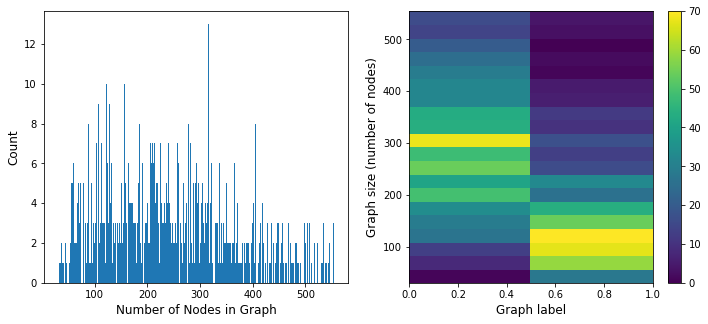

Correlation between graph size (number of nodes) and labels: -0.51


In [64]:
visualize_TUs_data('DD')

##  2.超像素数据集可视化

In [9]:
def visualize_superpixels_data(DATASET_NAME):
    print("[I] Loading data (notebook) ...")
    dataset = LoadData(DATASET_NAME)
    trainset, valset, testset = dataset.train, dataset.val, dataset.test
    print("[I] Finished loading.")

    # Original Statistics
    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.test, dataset.val]:
        num_nodes += [g.number_of_nodes() for g in split[:][0]]
        graph_labels += list(split[:][1].numpy())
    orig_mean, orig_std, orig_max, orig_min = np.mean(num_nodes), np.std(num_nodes), np.max(num_nodes), np.min(num_nodes)

    max_nodes = int(orig_mean+orig_std)
    print("Original Dataset Statistics:\n")
    print("Max nodes {}, Min nodes {}\n".format(orig_max, orig_min))
    print("Mean no. of nodes {}, S.d. {}\n".format(orig_mean, orig_std))

    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.test, dataset.val]:
        split_num_nodes, split_graph_labels = [], []
        g = split[:][0]
        lab = split[:][1]
        for idx in range(len(g)):
            if g[idx].number_of_nodes() < max_nodes:
                split_num_nodes.append(g[idx].number_of_nodes())
                split_graph_labels.append(lab[idx].item())


        num_nodes += split_num_nodes
        graph_labels += split_graph_labels
    label_bins = len(np.unique(graph_labels))
    
    print("VISUALIZATIONS:\nMax nodes in consideration: {}".format(max_nodes))
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    
    plt.hist(num_nodes, bins=len(np.unique(num_nodes)))
    plt.xlabel('Number of Nodes in Graph', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(122)
    plt.hist2d(graph_labels, num_nodes, bins=[label_bins, 20])
    plt.xlabel(r'Graph label', fontsize=12)
    plt.ylabel(r'Graph size (number of nodes)', fontsize=12)
    plt.colorbar()
    plt.show()

In [10]:
DATASET_NAME = 'covid19'

print("[I] Loading data (notebook) ...")
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test
print("[I] Finished loading.")

[I] Loading data (notebook) ...
[I] Loading dataset covid19...
train, test, val sizes : 5734 690 690
[I] Finished loading.
[I] Data load time: 8.2211s
[I] Finished loading.


### 超像素数据集：新冠肺炎（COVID19）CT数据集

[I] Loading data (notebook) ...
[I] Loading dataset covid19...
train, test, val sizes : 5734 690 690
[I] Finished loading.
[I] Data load time: 5.4745s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 150, Min nodes 111

Mean no. of nodes 119.97062131009278, S.d. 1.55802672200766

VISUALIZATIONS:
Max nodes in consideration: 121


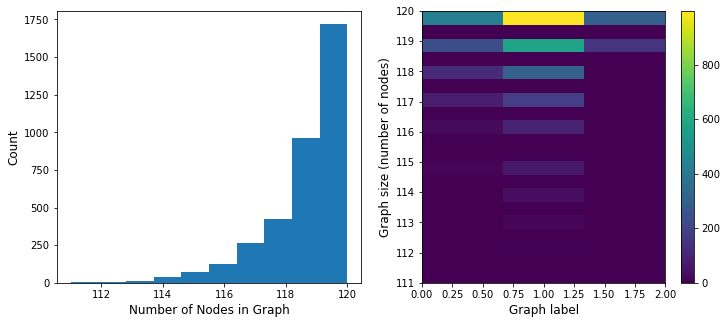

In [11]:
visualize_superpixels_data('covid19')